# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [52]:
# I know how to do this
data = None
# this is good to remember although I got the answer for this lab, but looked at the data with print(data) 
# found the order and used the count, however, may have mixed figures
male_df =  data.loc[data['Gender'] == 'Male']
female_df =  data.loc[data['Gender'] == 'Female']



  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

AttributeError: 'NoneType' object has no attribute 'loc'

In [53]:
data = pd.read_csv('weight-height.csv')
#male_df = [data.loc[i] for i in range(len(data)) if data.loc[i]["Gender"] == "Male"]
print(data)
# print(data.groupby("Gender").describe())
male_df  = data.iloc[:5000]
female_df =  data.iloc[5000:]

print("---------------------------------------------")
print(f"Male Height mean: {male_df.Height.mean()}")
print(f"Male Height mean: {male_df.Height.std()}")
print(f"Male Weight mean: {male_df.Weight.mean()}")
print(f"Male Weight mean: {male_df.Weight.std()}")
print(f"female Height mean: {female_df.Height.mean()}")
print(f"female Height mean: {female_df.Height.std()}")
print(f"female Weight mean: {female_df.Weight.mean()}")
print(f"female Weight mean: {female_df.Weight.std()}")
# data.describe(include='all')

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
5       Male  67.253016  152.212156
6       Male  68.785081  183.927889
7       Male  68.348516  167.971110
8       Male  67.018950  175.929440
9       Male  63.456494  156.399676
10      Male  71.195382  186.604926
11      Male  71.640805  213.741169
12      Male  64.766329  167.127461
13      Male  69.283070  189.446181
14      Male  69.243732  186.434168
15      Male  67.645620  172.186930
16      Male  72.418317  196.028506
17      Male  63.974326  172.883470
18      Male  69.640060  185.983958
19      Male  67.936005  182.426648
20      Male  67.915050  174.115929
21      Male  69.439440  197.731422
22      Male  66.149132  149.173566
23      Male  75.205974  228.761781
24      Male  67.893196  162.006652
25      Male  68.144033  192.343977
26      Male  69.089631  184

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

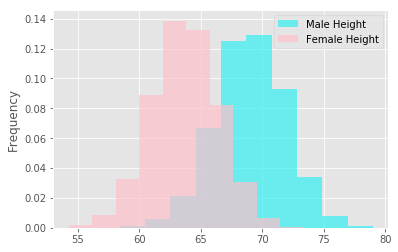

In [4]:
plt.hist(male_df.Height, bins = 10, label = 'Male Height', alpha = 0.7, color="#36f0f2", density=True)
plt.hist(female_df.Height, bins = 10, label = 'Female Height', alpha = 0.7, color="pink", density=True)
plt.ylabel ('Frequency')
plt.legend()
plt.show()

In [55]:
# Record your observations - are these inline with your personal observations?
#Seems accurate based on past observation men tend to be taller than women
# seems the median are accurate as we
# however, i'm sure women taller than 75in. exist
# most common section for female is between 61in. and 64in., while men are between 68in. and 72in.
# the male heights are more spread out
# heights are normally distributed


#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

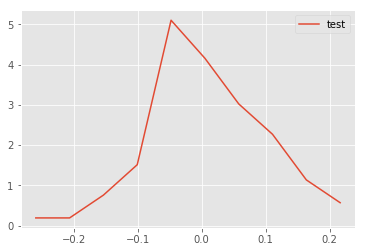

In [6]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays according to number of bins with zeros to store interpolated values
    # took this from the class readme
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = .5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return [pdfx, pdfy]




# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

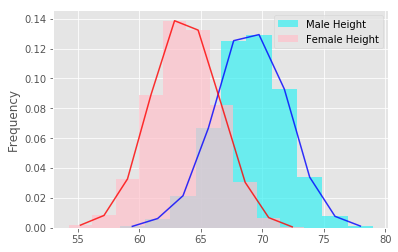

In [32]:
# You code here 
plt.hist(male_df.Height, bins = 10, label = 'Male Height', alpha = 0.7, color="#36f0f2", density=True)
plt.hist(female_df.Height, bins = 10, label = 'Female Height', alpha = 0.7, color="pink", density=True)
plt.ylabel ('Frequency')
x_m,y_m = density(male_df.Height)
x_f,y_f = density(female_df.Height)
plt.plot(x_m, y_m, color="blue", alpha=.8)
plt.plot(x_f, y_f, color="red", alpha=.8)
plt.legend()
plt.show()

#### Repeat above exerice for male and female weights

In [8]:
# Your code here 

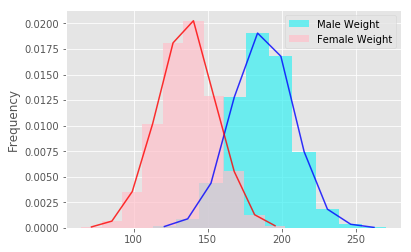

In [33]:
plt.hist(male_df.Weight, bins = 10, label = 'Male Weight', alpha = 0.7, color="#36f0f2", density=True)
plt.hist(female_df.Weight, bins = 10, label = 'Female Weight', alpha = 0.7, color="pink", density=True)
plt.ylabel ('Frequency')
x_m,y_m = density(male_df.Weight)
x_f,y_f = density(female_df.Weight)
plt.plot(x_m, y_m, color="blue", alpha=.8)
plt.plot(x_f, y_f, color="red", alpha=.8)
plt.legend()
plt.show()

#### Write your observations in the cell below.

In [56]:
# Record your observations - are these inline with your personal observations?
#Yes, men tend to be heavier than women
# So whats the takeaway when comparing male and female heights and weights 
# Men are generally bigger than women
# it is normally distributed
# men weights are more spread out
# most men in the data are between 175 to 190, while women are between 130 and 150
# common weight is 160lbs

#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Comparing Weights')

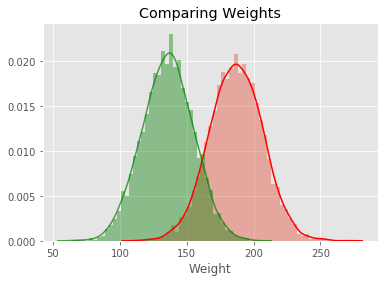

In [37]:
import seaborn as sns

sns.distplot(male_df.Weight,  
             hist=True, hist_kws={
                                  "linewidth" : 0,
                                  "edgecolor" :'salmon',
                                  "alpha": 0.4
                                  },
             kde=True, kde_kws = {
                                  'color': "red",
                                 }
            )
sns.distplot(female_df.Weight,
             hist=True, hist_kws={
                                  "linewidth" : 0,
                                  "alpha": 0.4, 
                                  "color":  "green"
                                  },
             kde=True, kde_kws = {
                                  'color': "green",
                                  "alpha": 0.7
                                 }
            )
plt.title("Comparing Weights")


Text(0.5,1,'Comparing Weights')

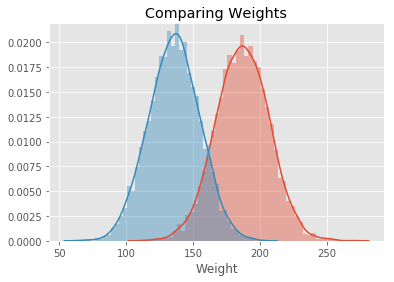

In [57]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?
# They are different in a way because the seaborn plot is smoother than the interpolation, but the 
#represention of the data is essentially the same
# normally distributed

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.